# Presentación final Grupo 24
### Integrantes: Battaglino Ignacio - Marcos Santiago - Rosli Bautista - Kesselman Federico

## 1- ¿Cómo divimos el trabajo y cómo nos organizamos con el repositorio?
#### Inicio, Datos y Ranking: Bauti
#### Juego: Nacho
#### Estadísticas: Santi y Fede

## 2- ¿Qué herramientas fueron utilizadas?
#### IDE: vscode 
#### Librerías primera parte: jupyter , streamlit , Unidecode
#### Librerías segunda parte: streamlit, pandas, unidecode, matplotlib, folium , streamlit_folium , streamlit-autorefresh
#### Herramientas para trabajar colaborativamente: GitLab

## 3- ¿Qué complicaciones tuvimos a la hora de desarrollar la aplicación?
#### - Delay en el sign in, cuando no existían usuarios cargados
#### - Problema en la implementación de las dificultades en la temática de conectividad

## 4- ¿Cómo las solucionamos?
#### - Log in automático al registrarse 
#### - Implementación de un timer a la hora de jugar 

---

### 5- ACTIVIDAD 6 POR PYTHON PLUS


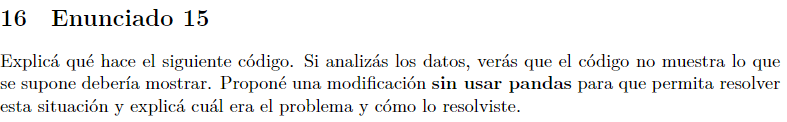

Veamos que hace el codigo proporcionado:

In [1]:
import csv

name_file = 'lagos_arg.csv'
with open(name_file, encoding='utf-8') as data_set:
    reader = csv.reader(data_set, delimiter=',')
    header, data = next(reader), reader

    pcias = ["Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Buenos Aires"]
    
    for pcia in pcias:
        for row in data:
            if row[1] == pcia:
                print("El lago", row[0], "está en", pcia)


El lago Lago Yehuin está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Chepelmut está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Río Bueno está en Tierra del Fuego, Antártida e Islas del Atlántico Sur


¿Cuál es el problema? 

El problema es que no se busca sobre el archivo csv los datos que coinciden con la provincia "Buenos Aires" Debido a que el objeto
reader es un iterable que a puede ser utilizado una unica vez ya que el mismo se consume luego de cada iteracion.

Soluciones propuestas:

In [9]:
# Cargar todo el archivo en una lista para asi poder iterarlo multiples veces.
# Ventaja: Simplicidad para acceder a los datos del archivo, no es necesario abrir el archivo varias veces.
# Deventaja: Cargar todo el archivo en memoria no suele ser la opcion mas eficiente.

import csv

name_file = 'lagos_arg.csv'
with open(name_file, encoding='utf-8') as data_set:
    reader = csv.reader(data_set, delimiter=',')
    header, data = next(reader), list(reader)  # Convertir el iterador a una lista

    pcias = ["Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Buenos Aires"]
    
    for pcia in pcias:
        for row in data:
            if row[1] == pcia:
                print("El lago", row[0], "está en", pcia)


El lago Lago Yehuin está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Chepelmut está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Río Bueno está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Epecuén está en Buenos Aires


In [14]:
# Volver a abrir el archivo para reiniciar el reader en cada provincia.
# Ventaja: Uso de memoria mas eficiente ya que no se carga todo el archivo.
# Deventaja: Reabrir el archivo repetidas veces puede ser un poco lento.

import csv

name_file = 'lagos_arg.csv'

pcias = ["Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Buenos Aires"]

for pcia in pcias: # Abrir el archivo por cada provincia.
    with open(name_file, encoding='utf-8') as data_set:
        reader = csv.reader(data_set, delimiter=',')
        header = next(reader) 

        for row in reader:
            if row[1] == pcia:
                print("El lago", row[0], "está en", pcia)


El lago Lago Yehuin está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Chepelmut está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Río Bueno está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Epecuén está en Buenos Aires


---

### Enunciado 12 Python Plus - Kesselman
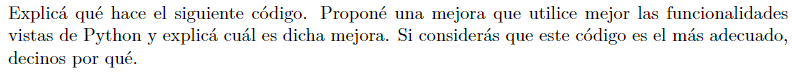

In [3]:
def double(x):
    return x*2

numbers = [1, 2, 3, 4]

for elem in numbers:
    print(double(elem), end=" ")

2 4 6 8 

### Mejora: 
Utilizar función **map** para aplicar *double* directamente a cada elemento de la lista. Luego se imprime sin necesidad del for utilizando print(*doubled_numbers, end=" ") , que va pasando uno a uno los elementos de *doubled_numbers* al print.

In [4]:
def double(x):
    return x*2

numbers = [1, 2, 3, 4]

# Map
doubled_numbers = map(double, numbers)

# Imprimir
print(*doubled_numbers, end=" ")

2 4 6 8 

### Enunciado 7 Python Plus- Marcos
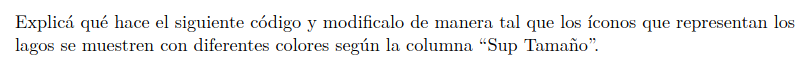

In [1]:
import pandas as pd
lagos = pd.read_csv('lagos_arg.csv')

In [2]:
import folium
def generate_map():
    attr = (
        '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a>'
        'contributors, &copy; <a href="https://cartodb.com/attributions">CartoDB</a>'
    )
    tiles = 'https://wms.ign.gob.ar/geoserver/gwc/service/tms/1.0.0/capabaseargenmap@EPSG%3A3857@png/{z}/{x}/{-y}.png'
    m = folium.Map(
        location=(-33.457606, -65.346857),
        control_scale=True,
        zoom_start=5,
        name='es',
        tiles=tiles,
        attr=attr
    )
    return m
def add_marker(row):
    folium.Marker(
        [row['Latitud en GD'], row['Longitud en GD']],
        popup=row['Nombre'],
        icon=folium.Icon()
        ).add_to(mapa)
mapa = generate_map()
lagos.apply(add_marker, axis=1)
mapa

#### Se puede solucionar con una nuea funcion que determina el color y modificando levemente add_marked:

In [5]:
def _get_color (elevation):
    """
    Recibe la elevación y retorna el color correspondiente a la elevación.
    """     
    if elevation == 'chico':
        color  = 'green'
    elif elevation == 'medio' :
        color = 'blue'
    else:
        color = 'red'
    return color

In [6]:
def add_marker(row):
    folium.Marker(
        [row['Latitud en GD'], row['Longitud en GD']],
        popup=row['Nombre'],
        icon=folium.Icon(color= _get_color(row['Sup Tamaño']))
        ).add_to(mapa)

In [7]:
mapa = generate_map()
lagos.apply(lambda row:add_marker(row), axis=1)
mapa